Introducción a TensorFlow
===


* *60 min* | Última modificación: Julio 12, 2019.

Esta lección presenta una introducción al cómputo numérico usando la API de bajo nivel de TensorFlow, a partir de la cual se construiran modelos de aprendizaje automático en lecciones posteriores. El lector puede referirse a los sitios de oficiales de Keras (https://keras.io) y TensorFlow (https://www.tensorflow.org) para mayor información y para obtener una visión más profunda de las herramientas y metodologías disponibles.

## Representación de cómputos mediante su árbol sintáctico.

En el siguiente ejemplo se evaluará la expresión 5 * 3 - (3 + 2). Esta expresión puede ser representada a través del siguiente árbol sintáctico donde los nodos interiores representan las operaciones aritméticas y los nodos finales representan las constantes numéricas:

     [-]
      +--- [*]
      |     +---- [5]
      |     +---- [3]
      |
      +--- [+]
            +---- [3]
            +---- [2]

Note que en esta expresión el nodo con la constante 3 es común a ambas ramas y podría representarse de forma optimizada como:

     [-]
      +--- [*]
      |     +---- [5]
      |     +-----------+
      |                 |
      +--- [+]         [3] 
            |           |
            +-----------+ 
            +---- [2]   

Si se tiene en cuenta que la constante 3 podría ser reemplazada por un cómputo complejo, se hace evidente que dicho cálculo sería realizado una sola vez con la consiguiente economía en el cómputo. 

## Gráficas computacionales en TensorFlow

El árbol sintáctico anterior es equivalente a una gráfica que representa los cómputos a realizar (gráfica computacional). Para realizar la representación usando TensorFlow, se debe construir explícitamente el grafo que representa el árbol anterior, para lo cual se enumeran los nodos de la siguiente forma:

     [-] (node6)
      +--- [*] (node4)
      |     +---- [5] (node1)
      |     +---------------------+
      |                           |
      +--- [+] (node5)           [3] (node3)
            |                     |
            +---------------------+ 
            +---- [2] (node2)

La gráfica computacional está conformado por:

* **Tensores**: Representa un vector de cualquier número de dimensiones. El rango (**rank**) es el número de dimensiones y la forma (**shape**) es una tupla de enteros indicando el tamaño en cada dimensión. Note que un escalar es un tensor de forma []. Corresponde a los nodos finales de la gráfica computacional.

* **Operaciones**: Representan los cálculos. Son los nodos internos de la gráfica computacional.

El código en Python que representa la gráfica computacional es el siguiente:

In [1]:
##
## Se importan las librerías
##
import tensorflow as tf
import numpy as np

In [2]:
node1 = tf.constant(5.0)           # Tensor []
node2 = tf.constant(2.0)           # Tensor []
node3 = tf.constant(3.0)           # Tensor []
node4 = tf.multiply(node1, node2)  # Operación
node5 = tf.add(node3, node2)       # Operación
node6 = tf.subtract(node4, node5)  # Operación 

El código anterior representa el flujo de datos del cómputo, pero no realiza propiamente el cálculo. Por ejemplo, la variable `node1` contiene el objeto en memoria (Tensor):

In [3]:
print(node1)

Tensor("Const:0", shape=(), dtype=float32)


TensorFlow maneja una gráfica computacional por defecto a la que se van agregando los nodos a medida que se van generando. Esta gráfica puede ser obtenida para su uso con la función `tf.get_default_graph()`.

Sin embargo, es posible crear y manipular gráficas computacionales con `tf.Graph()`. En el siguiente ejemplo se crean dos gráficas, una con la expresión  `1+2`  y la otra con `3*4`.

In [4]:
g1 = tf.Graph()
g2 = tf.Graph()

with g1.as_default():
    a = tf.constant(1)
    b = tf.constant(2)
    c = tf.add(a, b)
    
with g2.as_default():
    e = tf.constant(3)
    f = tf.constant(4)
    g = tf.multiply(e, f)

In [ ]:
## Sesiones en TensorFlow

Para poder ejecutar los cálculos que describe la gráfica computacional es necesario abrir una sesión. Cuando una gráfica de cómputo no es especificada, se usa la gráfica por defecto del sistema (`
tf.get_default_graph()`).

In [5]:
##
##  Abre la sesión y luego la cierra
##
with tf.Session() as sess:
    outs = sess.run(node6)          ## realiza la evaluación
    print("outs = {}".format(outs)) ## imprime el resultado de la evaluación

outs = 5.0


In [6]:
##
##  Para computar el resultado en un nodo se puede usar eval()
##  Note que es necesario pasar la sesión abierta a eval() 
##  para realizar la evaluación.
##
with tf.Session() as sess:
    print('node6 = {}'.format(node6.eval()))
    print('node4 = {}'.format(node4.eval()))

node6 = 5.0
node4 = 10.0


In [7]:
##
## run() admite una lista de nodos a evaluar
##
with tf.Session() as sess:
    outs = sess.run([node6, node4, node5])
    print("outs = {}".format(outs))

outs = [5.0, 10.0, 5.0]


In [8]:
##
## La sesión puede ser almacenada en una variable
## y usada en cálculos posteriores
##
sess = tf.Session()             ## Abre la sesion (en IPython use tf.InteractiveSession())
outs = sess.run(node6)          ## Evalua el grafo y almacena el resultado
sess.close()                    ## Cierra la sesión
print("outs = {}".format(outs)) ## imprime el resultado de la evaluación

outs = 5.0


Para pasar una gráfica en particular se usa el parámetro `graph`.

In [9]:
with tf.Session(graph = g1) as sess:
    print(sess.run(c))

3


In [10]:
with tf.Session(graph = g2) as sess:
    print(sess.run(g))

12


**Actividad.---** Construya a mano el gráfico de flujo de datos de la expresión

$$-0.9 * 2^3 + 2.5 * 2^2 - 3.8 * 2 -4.3$$

**Actividad.---** Realice el cómputo anterior usando TensorFlow.

donde la parte superior corresponde a la grafica colapsada y la parte inferior a la gráfica expandida.

## Operaciones con escalares

En la sección anterior se presentaron algunas operaciones aritméticas con TensorFlow. A continuación se resumen las operaciones aritméticas más comunes (la lista completa de operadores puede ser consultada en https://www.tensorflow.org/api_guides/python/math_ops)

    Operacion               equivalente
    --------------------------------------
    tf.add(a, b)            a + b
    tf.multiply(a, b)       a * b
    tf.subtract(a, b)       a - b
    tf.divide(a, b)         a / b
    tf.pow(a, b)            a ** b
    tf.mod(a, b)            a % b
    
    tf.abs(a)               abs(a)
    tf.square(a)            a ** 2
    tf.sqrt(a)              sqrt(a)
    tf.exp(a)               exp(a)
    tf.negative(a)          -a
    tf.sigmoid(a)           1 / (1 + exp(-a))
    tf.sign                 sign(a)
    tf.maximum
    tf.minimum
    
    tf.logical_and(a, b)    a & b
    tf.logical_or(a, b)     a | b   
    tf.greater(a, b)        a > b
    tf.greater_equal(a, b)  a >= b
    tf.less_equal(a, b)     a <= b
    tf.less(a, b)           a < b
    tf.logical_not(a)       ~a 
    tf.equal(a, b)          a == b
    tf.not_equal            a != b
    


---
**Actividad.--** Compute las siguientes expresiones usando TensorFlow y use TensorBoard para visualizar las gráficas computacionales.

* $|3 - 4| - (4 - 3)$


* $\sqrt{3^2 - 4*3*1}$


* $\frac{1}{2}*3^2 - \frac{5*2 - \exp{(-2)}}{3^2}$

---

## Operaciones matriciales

TensorFlow también soporta una gran cantidad de operaciones matriciales. A continuación se presentan ejemplos de las más comunes.

In [13]:
## Convierte una matriz de numpy a un tensor
with tf.Session() as sess:
    a = np.ones((3,3))
    b = tf.convert_to_tensor(a).eval()
print(b)

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


In [14]:
## crea un tensor de 2x2 con ceros
with tf.Session() as sess:
    print(tf.zeros((2,2)).eval())

[[0. 0.]
 [0. 0.]]


In [15]:
## crea un tensor de 2x2 con unos
with tf.Session() as sess:
    print(tf.ones((2,2)).eval())

[[1. 1.]
 [1. 1.]]


In [16]:
## crea un tensor de 3x2 con aleatorios 
## normales estándar
with tf.Session() as sess:
    print(tf.random_normal((3,2),     ## shape
                           0,         ## mean
                           1).eval()) ## sd

[[-0.20506313  0.17841227]
 [ 1.5516684   0.30868837]
 [-0.03633828  1.4230912 ]]


In [17]:
## crea un tensor de 3x2 con aleatorios 
## normales truncado
with tf.Session() as sess:
    print(tf.truncated_normal((3,2),     ## shape
                              0,         ## mean
                              1).eval())  ## sd

[[ 1.3468192  -0.480845  ]
 [ 0.26967958  0.28794277]
 [ 1.4879166   1.8170801 ]]


In [18]:
## crea un tensor de aleatorios uniformes de 3x2
with tf.Session() as sess:
    print(tf.random_uniform((3,2),     ## shape
                            0,         ## minval
                            1).eval())  ## maxval

[[0.03041756 0.9151478 ]
 [0.69149184 0.716274  ]
 [0.05151224 0.90072906]]


In [19]:
## crea un tensor de 3x2 lleno de 4s.
with tf.Session() as sess:
    print(tf.fill((3,2),      ## shape
                  4).eval())   ## value

[[4 4]
 [4 4]
 [4 4]]


In [20]:
## crea un tensor de reales igualmente
## espaciados entre 0.0 y 1.0
with tf.Session() as sess:
    print(tf.linspace(0.0, 1.0, 11).eval())

[0.         0.1        0.2        0.3        0.4        0.5
 0.6        0.7        0.8        0.90000004 1.        ]


In [21]:
## crea un tensor constante a partir de 
## una lista de listas que representa una
## matriz
with tf.Session() as sess:
    print(tf.constant([[1,2,3], 
                       [4,5,6]]).eval())

[[1 2 3]
 [4 5 6]]


In [22]:
## genera un tensor mezclando los elementos
## de un tensor constante
with tf.Session() as sess:
    print(tf.random_shuffle(tf.constant([1,2,3,4,5,6])).eval())

[4 5 2 1 3 6]


In [23]:
## crea un tensor a partir de una lista
## de lista que representa una matriz
with tf.Session() as sess:
    m = tf.constant([[1,2,3], 
                     [4,5,6]])

In [24]:
## suma de las columnas de un tensor
with tf.Session() as sess:
    print(tf.reduce_sum(m, reduction_indices = 0).eval())

[5 7 9]


In [25]:
## suma de las filas de un tensor
with tf.Session() as sess:
    print(tf.reduce_sum(m, reduction_indices = 1).eval())

[ 6 15]


In [26]:
## suma de todos los elementos de un tensor
with tf.Session() as sess:
    print(tf.reduce_sum(m).eval())

21


TensorFlow implementa las siguiente funciones para reducir un tensor (https://www.tensorflow.org/api_guides/python/math_ops#Reduction)

    tf.reduce_sum
    tf.reduce_prod
    tf.reduce_min
    tf.reduce_max
    tf.reduce_mean
    tf.reduce_all
    tf.reduce_any
    tf.reduce_logsumexp
    tf.count_nonzero
    tf.accumulate_n
    tf.einsum
    

In [27]:
## obtiene las dimensiones de un tensor
with tf.Session() as sess:
    m = tf.constant([[1,2,3], 
                     [4,5,6]])
    print(m.get_shape())

(2, 3)


In [28]:
## suma dos tensores
with tf.Session() as sess:
    a = m + m
    print(a.eval())

[[ 2  4  6]
 [ 8 10 12]]


In [29]:
## cambia las dimensiones de un tensor
with tf.Session() as sess:
    print(tf.reshape(m,(1,6)).eval())

[[1 2 3 4 5 6]]


In [30]:
## cambia las dimensiones de un tensor
with tf.Session() as sess:
    print(tf.reshape(m,(3,2)).eval())

[[1 2]
 [3 4]
 [5 6]]


In [31]:
## suma varios tensores elemento a elemento
##  
##  |1  2|     |5  0|     |1  2|    |7  4|
##  |    |  +  |    |  +  |    |  = |    |
##  |3  4|     |0  6|     |3  4|    |6 14|
##
with tf.Session() as sess:
    a = tf.constant([[1, 2], 
                     [3, 4]])
    b = tf.constant([[5, 0], 
                     [0, 6]])
    print(tf.accumulate_n([a, b, a]).eval())  # [[7, 4], [6, 14]]

[[ 7  4]
 [ 6 14]]


In [32]:
## suma varios tensores elemento a elemento
with tf.Session() as sess:
    print(tf.add_n([a, b, a]).eval())

[[ 7  4]
 [ 6 14]]


In [33]:
## Busca el valor máximo en el tensor y devuelve la posición contando desde cero
with tf.Session() as sess:
    print(tf.argmax(tf.constant([1,3,2,4,0])).eval())

3


In [34]:
## Busca el valor mínimo en el tensor y devuelve la posición contando desde cero
with tf.Session() as sess:
    print(tf.argmin(tf.constant([1,3,2,4,0])).eval())

4


In [35]:
## Aplica una función a cada elemento de un tensor
## La función f() se aplica al argumento m.
f = lambda m : tf.cond(tf.greater_equal(m, 0.0), 
                       true_fn  = lambda :  tf.constant(1.), 
                       false_fn = lambda : tf.constant(0.0))
## define el tensor x
x = tf.constant([10.0, -1.0])

## aplica la función f a cada elemento de x
y = tf.map_fn(f, x)

with tf.Session() as sess:
    print(sess.run(y))

Instructions for updating:
Colocations handled automatically by placer.
[1. 0.]


**Actividad.---** Para las matrices

$$\mathbf{X} =
\left[
  \begin{array}{cc}
     1.0 & 2.1 \\
     1.9 & 3.2 \\
     3.0 & 3.9 \\
     4.2 & 5.2 
  \end{array}
\right],
\qquad \mathbf{y} = 
\left[
  \begin{array}{c}
     3.1 \\
     4.0 \\
     5.1 \\
     6.1  
  \end{array}
\right]
$$

compute

* $\mathbf{z} = (\mathbf{X}' \mathbf{X})^{-1} \mathbf{X}' \mathbf{y}$


* $\mathbf{p} = \mathbf{X} \mathbf{z}$

**Actividad.---** Indique para que sirven las siguientes funciones del modulo `tf` y realice un ejemplo:

    tf.clip_by_value
    tf.clip_by_norm
    tf.clip_by_average_norm
    tf.clip_by_global_norm
    tf.clip_by_norm
    tf.concat
    tf.case
    tf.cond
    tf.cumprod
    tf.cumsum
    tf.diag
    tf.inverse_permutation
    tf.log_sigmoid 
    tf.map_fn
    
    tf.matrix_inverse
    tf.matrix_diag
    tf.matrix_set_diag
    tf.matrix_solve
    tf.matrix_transpose
    tf.parallel_stack
    tf.stack
    tf.random_shuffle
    tf.reverse
    
    tf.maximum
    tf.minimum

## Variables y Placeholders

Las variables en TensorFlow pueden entenderse como las variables locales de una función, las cuales no pueden ser accesadas desde el exterior. Los placeholders son equivalentes a los parámetros, los cuales pueden tomar cualquier valor cuando se llama la función. En el siguiente ejemplo se evalua la expresión a * b - (b + c) para diferentes valores de a, b y c.

     [-] (node6)
      +--- [*] (node4)
      |     +---- [a] (node1)
      |     +---------------------+
      |                           |
      +--- [+] (node5)           [b] (node2)
            +---- [c] (node3)     |
            +---------------------+ 

In [36]:
## define a, b y c como placeholders
a = tf.placeholder(tf.float32)
b = tf.placeholder(tf.float32)
c = tf.placeholder(tf.float32)

## define los nodos de cómputo
node4 = tf.multiply(a, b)
node5 = tf.add(c, b)
node6 = tf.subtract(node4, node5)

## evalua la operación para diferentes valores de a, b y c.
with tf.Session() as sess:
    print(sess.run(node6, feed_dict={a: 5, b:3, c:2}))
    print(sess.run(node6, feed_dict={a: 4, b:2, c:3}))
    print(sess.run(node6, feed_dict={a: 4, b:3, c:1}))

10.0
3.0
8.0


In [37]:
##
## la misma operación pero matricial
##
a = tf.placeholder(tf.float32, shape=(3,3))
b = tf.placeholder(tf.float32, shape=(3,3))
c = tf.placeholder(tf.float32, shape=(3,3))

node4 = tf.multiply(a, b)
node5 = tf.add(c, b)
node6 = tf.subtract(node4, node5)

with tf.Session() as sess:    
    print(sess.run(node6, feed_dict={a: [[1, 0, 0,],
                                         [0, 1, 0,],
                                         [0, 0, 1,]],
                                     b: np.random.normal(size=(3,3)), 
                                     c: np.random.normal(size=(3,3))}))

[[ 0.4894185  -0.33874786  0.7626736 ]
 [-1.6902115   0.14211619  0.95860374]
 [ 0.07947559 -0.45718622  1.4384198 ]]


El siguiente ejemplo presente un acumulador para el calculo de $n = n + 1$.

    [=] (node1)  
     +---[n]
     +---[+] (node0)
          +----[n]
          +----[1]
     

In [38]:
## crea la variable y la inicializa a cero
n = tf.Variable(0)

## arbol sintactico que representa las operaciones
node0 = tf.add(n, tf.constant(1))
node1 = tf.assign(n, node0)

## evalua
with tf.Session() as sess:
    
    ## las variables deben ser inicializadas antes
    ## de usarse
    sess.run(tf.global_variables_initializer())
    
    for i in range(5):
        
        ## el valor de las variables se retiene entre
        ## las llamadas a run()
        print(sess.run(node1))

1
2
3
4
5


In [39]:
## crea la variable y la inicializa a cero
n = tf.Variable(0)

## arbol sintactico que representa las operaciones
## se usa tf.assign_add para simplificar el arbol
## tambien existe tf.assign_sub
node0 = tf.assign_add(n, tf.constant(1))
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(5):
        print(sess.run(node0))

1
2
3
4
5


**Actividad.---** Evalue la función

$$f(x) = 0.3x^3 - 0.6x^2 - 0.1x + 0.5$$

para el vector


$$\mathbf{x} = 
\left[
  \begin{array}{c}
     1.0 \\
     4.2 \\
     3.1 \\
     6.3  
  \end{array}
\right]
$$




**Actividad.---** Genere los 10 primeros términos de la serie de Fibonacci usando TensorFlow.

    1, 1, 2, 3, 5, 8, 13, ...

## Uso de TensorFlow con otras librerías de Python

Los resultados de cómputos realizados con TensorFlow pueden ser asignados a variables en Python para ser usados directamente con otras librerías. En el siguiente ejemplo, se generan 20 puntos  aleatorios normales estándar y luego se grafican usando `matplotlib`.

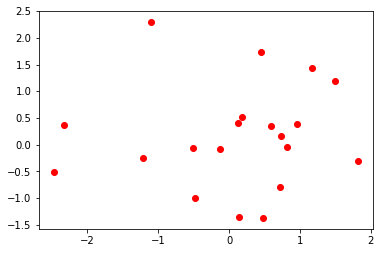

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline

## Genera un tensor de 2x20 con valores aleatorios 
a = tf.random_normal([2, 20])

## Realiza el cómputo
with tf.Session() as sess:
    result = sess.run(a)
    
## Asigna las columnas de la matriz a x y y    
x, y = result

## Construye el gráfico
plt.scatter(x, y, color='red');